<a href="https://colab.research.google.com/github/AllisonOge/predictive_modeling/blob/main/predictive_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
sns.set(style='darkgrid')
# increase the figure size
sns.set(rc={'figure.figsize': (15, 5)})


import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import BinaryAccuracy
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
sensor_df = pd.read_csv("sensor_ml.csv", index_col="id")

In [3]:
sensor_df

,chan_1,chan_2,chan_3,chan_4,created_at
id,,,,,
1,1,1,0,1,2022-10-26 11:29:12
2,1,1,0,1,2022-10-26 11:29:12
3,1,1,0,1,2022-10-26 11:29:13
4,1,1,0,1,2022-10-26 11:29:13
5,1,1,0,1,2022-10-26 11:29:13
...,...,...,...,...,...
3660,1,1,0,1,2022-10-26 11:40:06
3661,1,1,0,1,2022-10-26 11:40:06
3662,1,1,0,1,2022-10-26 11:40:06


In [4]:
sensor_df.shape

(3664, 5)

In [5]:
pd.__version__

'1.3.5'

In [6]:
sensor_df.groupby("created_at")["chan_1"].value_counts()

created_at           chan_1
2022-10-26 11:29:12  1         2
2022-10-26 11:29:13  1         6
2022-10-26 11:29:14  1         7
2022-10-26 11:29:15  1         7
2022-10-26 11:29:16  1         5
                              ..
2022-10-26 11:40:04  1         5
2022-10-26 11:40:05  1         6
2022-10-26 11:40:06  1         5
2022-10-26 11:42:25  0         1
2022-10-26 11:42:30  0         1
Name: chan_1, Length: 678, dtype: int64

In [7]:
sensor_df.groupby("created_at")["chan_2"].value_counts()

created_at           chan_2
2022-10-26 11:29:12  1         2
2022-10-26 11:29:13  1         6
2022-10-26 11:29:14  1         7
2022-10-26 11:29:15  1         7
2022-10-26 11:29:16  1         5
                              ..
2022-10-26 11:40:04  1         5
2022-10-26 11:40:05  1         6
2022-10-26 11:40:06  1         5
2022-10-26 11:42:25  0         1
2022-10-26 11:42:30  0         1
Name: chan_2, Length: 711, dtype: int64

In [8]:
sensor_df.groupby("created_at")["chan_3"].value_counts()

created_at           chan_3
2022-10-26 11:29:12  0         2
2022-10-26 11:29:13  0         6
2022-10-26 11:29:14  0         7
2022-10-26 11:29:15  0         7
2022-10-26 11:29:16  0         5
                              ..
2022-10-26 11:40:04  0         5
2022-10-26 11:40:05  0         6
2022-10-26 11:40:06  0         5
2022-10-26 11:42:25  0         1
2022-10-26 11:42:30  0         1
Name: chan_3, Length: 706, dtype: int64

In [9]:
sensor_df.groupby("created_at")["chan_4"].value_counts()

created_at           chan_4
2022-10-26 11:29:12  1         2
2022-10-26 11:29:13  1         6
2022-10-26 11:29:14  1         7
2022-10-26 11:29:15  1         7
2022-10-26 11:29:16  0         3
                              ..
2022-10-26 11:40:04  1         1
2022-10-26 11:40:05  1         6
2022-10-26 11:40:06  1         5
2022-10-26 11:42:25  0         1
2022-10-26 11:42:30  0         1
Name: chan_4, Length: 867, dtype: int64

In [10]:
sensor_copy_df = sensor_df
sensor_copy_df = sensor_copy_df.drop_duplicates(subset="created_at")
sensor_copy_df = sensor_copy_df.set_index("created_at")

In [11]:
sensor_copy_df

,chan_1,chan_2,chan_3,chan_4
created_at,,,,
2022-10-26 11:29:12,1,1,0,1
2022-10-26 11:29:13,1,1,0,1
2022-10-26 11:29:14,1,1,0,1
2022-10-26 11:29:15,1,1,0,1
2022-10-26 11:29:16,1,1,0,1
...,...,...,...,...
2022-10-26 11:40:04,1,1,0,0
2022-10-26 11:40:05,1,1,0,1
2022-10-26 11:40:06,1,1,0,1


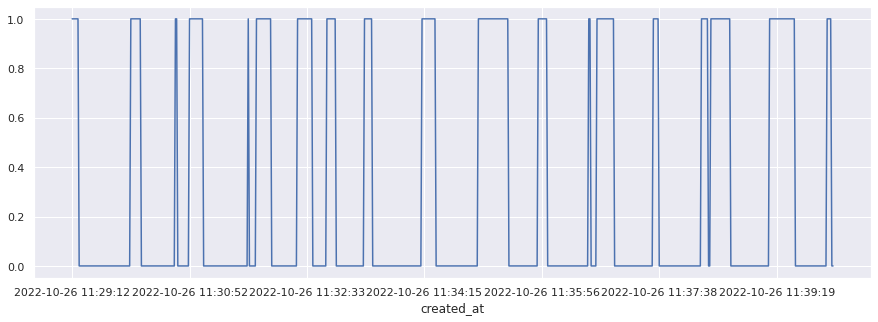

In [12]:
sensor_copy_df["chan_1"].plot()

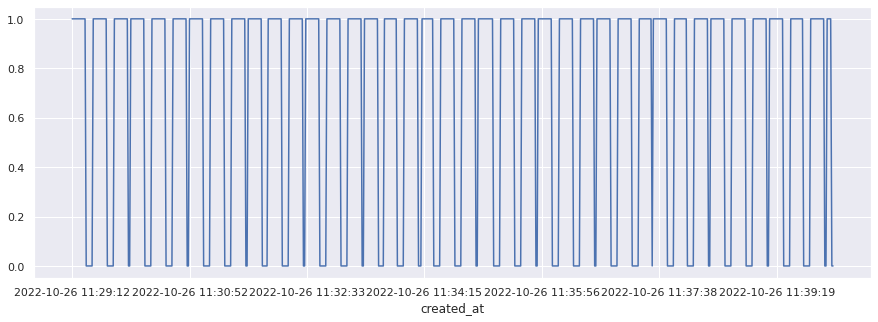

In [13]:
sensor_copy_df["chan_2"].plot()

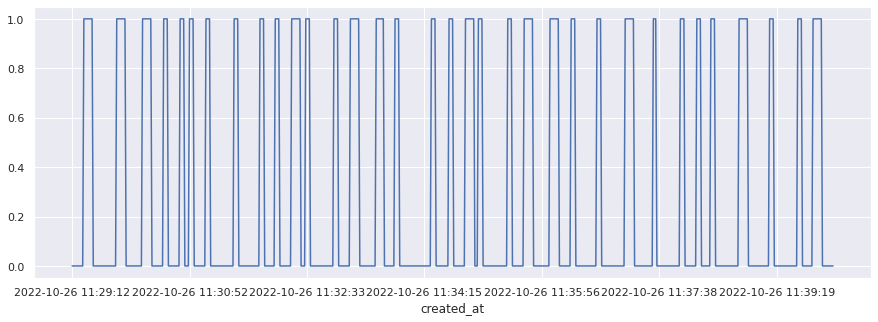

In [14]:
sensor_copy_df["chan_3"].plot()

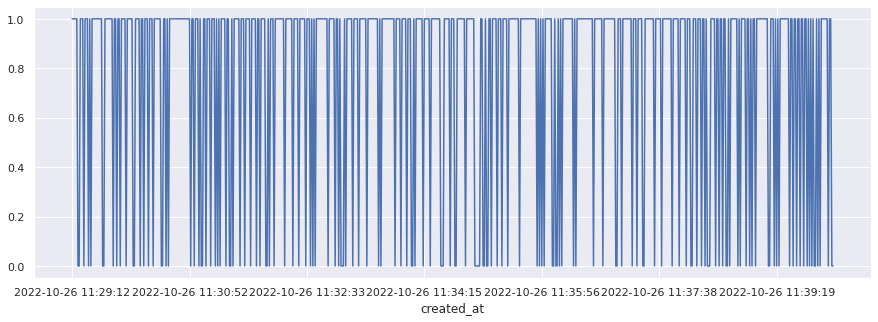

In [15]:
sensor_copy_df["chan_4"].plot()

In [16]:
sensor_copy_df.to_numpy()

array([[1, 1, 0, 1],
       [1, 1, 0, 1],
       [1, 1, 0, 1],
       ...,
       [1, 1, 0, 1],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [17]:
def df_to_X_y(df, window_size=10):
  X = []
  y = []
  for i in range(df.shape[0]-window_size):
    X.append([r for r in df.to_numpy()[i:window_size+i]])
    y.append(df.to_numpy()[window_size+i])
  return np.array(X), np.array(y)

In [18]:
X, y =df_to_X_y(sensor_copy_df)
X.shape, y.shape

((639, 10, 4), (639, 4))

In [19]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.6)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

## Build the model 🧠

In [20]:
def build_model():
  return tf.keras.Sequential([
      tf.keras.layers.Input((X.shape[1], X.shape[2])),
      tf.keras.layers.LSTM(16),
      tf.keras.layers.Dense(8, activation="relu"),
      tf.keras.layers.Dense(4, activation="sigmoid")
  ])

In [21]:
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(255, 10, 4) (255, 4)
(192, 10, 4) (192, 4)
(192, 10, 4) (192, 4)


In [22]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 16)                1344      
                                                                 
 dense (Dense)               (None, 8)                 136       
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
Total params: 1,516
Trainable params: 1,516
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(loss=BinaryCrossentropy(), optimizer=Adam(learning_rate=0.001), metrics=BinaryAccuracy())

In [35]:
history = model.fit(X_train, y_train, epochs=50, batch_size=30, validation_data=(X_valid, y_valid))

Epoch 1/50
9/9 [==============================] - 0s 28ms/step - loss: 0.3984 - binary_accuracy: 0.8225 - val_loss: 0.4297 - val_binary_accuracy: 0.8229
Epoch 2/50
9/9 [==============================] - 0s 15ms/step - loss: 0.3945 - binary_accuracy: 0.8343 - val_loss: 0.4268 - val_binary_accuracy: 0.8229
Epoch 3/50
9/9 [==============================] - 0s 13ms/step - loss: 0.3902 - binary_accuracy: 0.8392 - val_loss: 0.4249 - val_binary_accuracy: 0.8281
Epoch 4/50
9/9 [==============================] - 0s 13ms/step - loss: 0.3869 - binary_accuracy: 0.8471 - val_loss: 0.4221 - val_binary_accuracy: 0.8333
Epoch 5/50
9/9 [==============================] - 0s 11ms/step - loss: 0.3841 - binary_accuracy: 0.8412 - val_loss: 0.4192 - val_binary_accuracy: 0.8359
Epoch 6/50
9/9 [==============================] - 0s 10ms/step - loss: 0.3802 - binary_accuracy: 0.8431 - val_loss: 0.4175 - val_binary_accuracy: 0.8398
Epoch 7/50
9/9 [==============================] - 0s 9ms/step - loss: 0.3783 - bin

Text(0, 0.5, 'accuracy')

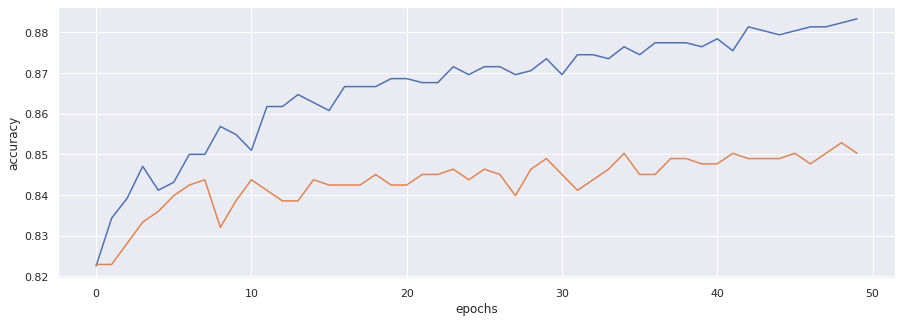

In [36]:
plt.plot(history.history["binary_accuracy"], label="Training accuracy")
plt.plot(history.history["val_binary_accuracy"], label="Validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")

Text(0, 0.5, 'loss')

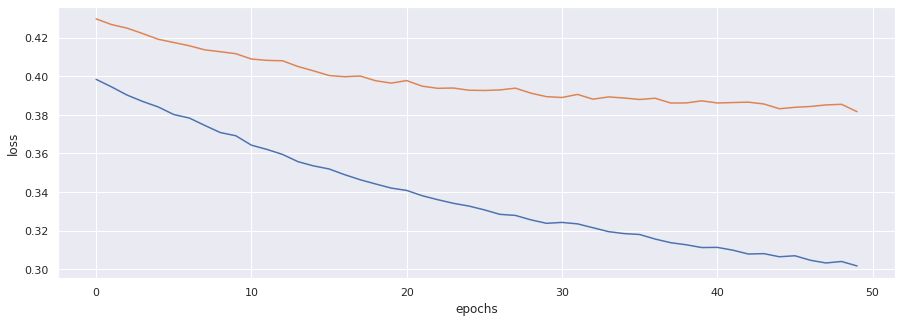

In [37]:
plt.plot(history.history["loss"], label="Training loss")
plt.plot(history.history["val_loss"], label="Validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")

In [38]:
test_predictions = (model.predict(X_test)>0.5).astype(int)
test_predictions 

6/6 [==============================] - 0s 3ms/step


array([[1, 1, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 1, 0, 1],
       [0, 1, 0, 1],
       [1, 1, 0, 1],
       [0, 1, 0, 1],
       [0, 0, 0, 1],
       [0, 1, 0, 1],
       [0, 1, 0, 1],
       [0, 1, 1, 1],
       [1, 1, 0, 1],
       [1, 1, 0, 1],
       [0, 1, 1, 1],
       [0, 1, 0, 1],
       [1, 1, 0, 1],
       [0, 1, 0, 1],
       [0, 1, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 1, 1, 1],
       [1, 1, 0, 0],
       [0, 1, 1, 1],
       [0, 1, 1, 1],
       [0, 0, 0, 1],
       [1, 1, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 1, 0, 1],
       [0, 0, 1, 0],
       [1, 1, 0, 1],
       [0, 1, 1, 1],
       [0, 1, 1, 1],
       [0, 1, 1, 1],
       [0, 1, 1, 1],
       [1, 1, 0, 1],
       [0, 1, 0, 1],
       [0, 1, 0, 1],
       [0, 1, 0, 1],
       [0, 1, 0, 1],
       [0, 0, 0, 0],
       [0, 1, 1, 1],
       [0, 1, 0, 1],
       [1, 0, 0, 0],
       [0, 1, 1, 1],
       [1, 1, 0, 1],
       [0, 0,

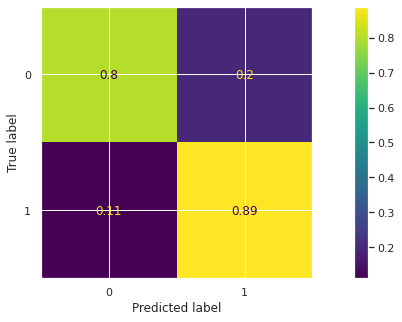

In [39]:
cm = metrics.confusion_matrix(y_test.flatten(), test_predictions.flatten(), normalize="true")
display_cm = metrics.ConfusionMatrixDisplay(cm)
display_cm.plot()

Hypothesis 🤔: Can my model predict the idle time for a channel?

In [41]:
def start_and_idle_time(bit_sequence):
    bit_sequence = np.asarray(bit_sequence, dtype=np.int32)
    start_time = 0
    idle_time = 0
    idle_times = []
    for i, bit in enumerate(bit_sequence):
        # print(i, bit)
        if i > 0:
            if bit == 0 and bit_sequence[i-1] == 1:
                # 1,0
                start_time = i
                idle_time += 1
            elif bit == 0 and bit_sequence[i-1] == 0:
                # 0,0
                idle_time += 1
            elif bit == 1 and bit_sequence[i-1] == 0:
                # 0,1
                idle_times.append((start_time, idle_time))
                idle_time = 0
            else:
                # 1,1
                continue
        else:
            if bit == 0:
                start_time = i
                idle_time += 1

        if i == len(bit_sequence)-1 and idle_time > 0:
            idle_times.append((start_time, idle_time))

    return np.array(idle_times)

In [59]:
def df_to_X_y2(df, window_size=10):
  X = []
  y = []
  for i in range(df.shape[0]-window_size):
    X.append([r for r in df.to_numpy()[i:window_size+i]])
    idle_times = [i[0][1] for i in  list(map(start_and_idle_time, df.to_numpy()[window_size+i:].transpose()))]
    y.append(idle_times)
  return np.array(X), np.array(y)

In [60]:
X2, y2 = df_to_X_y2(sensor_copy_df)
X2.shape, y2.shape

((639, 10, 4), (639, 4))

In [63]:
X2_train, X2_temp, y2_train, y2_temp = train_test_split(X2, y2, test_size=0.6)
X2_test, X2_val, y2_test, y2_val = train_test_split(X2_temp, y2_temp, test_size=0.5)
X2_train.shape, X2_test.shape, X2_val.shape

((255, 10, 4), (192, 10, 4), (192, 10, 4))

In [68]:
def build_model2():
  return tf.keras.models.Sequential([
      tf.keras.layers.Input((X2.shape[1], X2.shape[2])),
      tf.keras.layers.LSTM(16),
      tf.keras.layers.Dense(8, activation="relu"),
      tf.keras.layers.Dense(4, activation="linear")
  ])

In [69]:
model2 = build_model2()
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 16)                1344      
                                                                 
 dense_6 (Dense)             (None, 8)                 136       
                                                                 
 dense_7 (Dense)             (None, 4)                 36        
                                                                 
Total params: 1,516
Trainable params: 1,516
Non-trainable params: 0
_________________________________________________________________


In [74]:
model2.compile(loss="mse", optimizer=Adam(learning_rate=0.001), metrics=["accuracy"])

In [75]:
history2 = model2.fit(X2_train, y2_train, batch_size=30, epochs=50, validation_data=(X2_val, y2_val))

Epoch 1/50
9/9 [==============================] - 3s 77ms/step - loss: 165.0919 - accuracy: 0.0627 - val_loss: 163.3020 - val_accuracy: 0.1250
Epoch 2/50
9/9 [==============================] - 0s 17ms/step - loss: 164.4021 - accuracy: 0.1451 - val_loss: 162.7285 - val_accuracy: 0.1458
Epoch 3/50
9/9 [==============================] - 0s 11ms/step - loss: 163.7221 - accuracy: 0.1451 - val_loss: 161.7789 - val_accuracy: 0.0729
Epoch 4/50
9/9 [==============================] - 0s 11ms/step - loss: 162.3555 - accuracy: 0.0314 - val_loss: 159.5948 - val_accuracy: 0.0052
Epoch 5/50
9/9 [==============================] - 0s 10ms/step - loss: 159.4738 - accuracy: 0.0000e+00 - val_loss: 155.6486 - val_accuracy: 0.0052
Epoch 6/50
9/9 [==============================] - 0s 11ms/step - loss: 154.7929 - accuracy: 0.0000e+00 - val_loss: 149.6428 - val_accuracy: 0.0052
Epoch 7/50
9/9 [==============================] - 0s 11ms/step - loss: 147.7655 - accuracy: 0.0000e+00 - val_loss: 141.0304 - val_accu

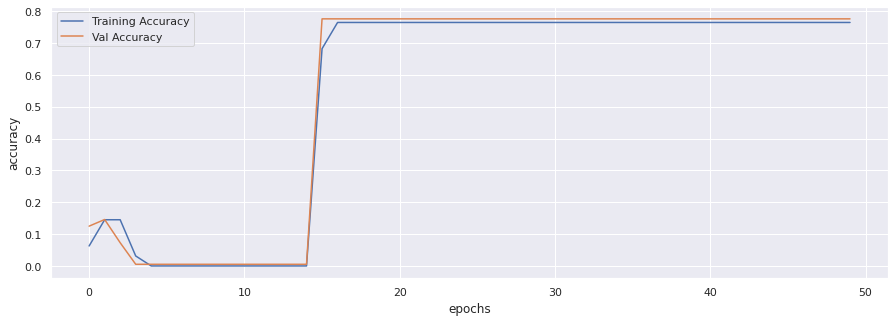

In [79]:
plt.plot(history2.history["accuracy"], label="Training Accuracy")
plt.plot(history2.history["val_accuracy"], label="Val Accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()

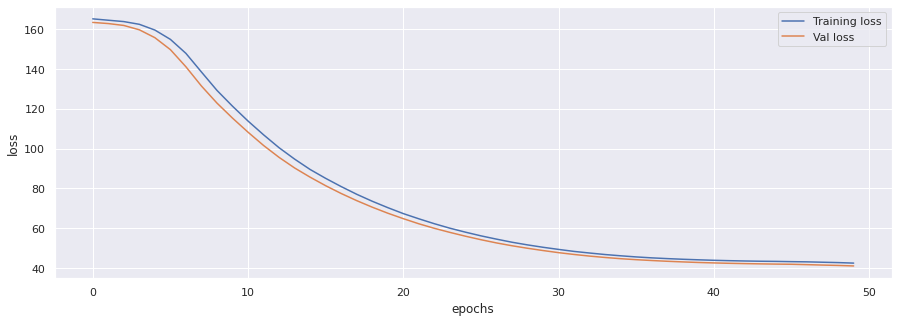

In [78]:
plt.plot(history2.history["loss"], label="Training loss")
plt.plot(history2.history["val_loss"], label="Val loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()

In [80]:
test_preds = model2.predict(X2_test)
test_preds

6/6 [==============================] - 0s 3ms/step


array([[18.619913 ,  4.140368 , 10.03309  ,  1.1341692],
       [18.526875 ,  4.1264157,  9.975041 ,  1.1140423],
       [17.851126 ,  3.8771033,  9.680209 ,  1.3522041],
       [18.927942 ,  4.235745 , 10.190625 ,  1.0480409],
       [18.163588 ,  3.9767544,  9.832686 ,  1.2751737],
       [18.552202 ,  4.118953 , 10.003021 ,  1.1410364],
       [18.895254 ,  4.2255797, 10.17727  ,  1.0462694],
       [18.356354 ,  4.0560985,  9.906446 ,  1.1960402],
       [18.189018 ,  4.000223 ,  9.82856  ,  1.23892  ],
       [18.766428 ,  4.205229 , 10.091136 ,  1.0433278],
       [18.20827  ,  3.999665 ,  9.847508 ,  1.2393434],
       [17.975534 ,  3.927172 ,  9.730617 ,  1.2993901],
       [18.931707 ,  4.230623 , 10.202716 ,  1.0475317],
       [18.330275 ,  4.033481 ,  9.906482 ,  1.2383125],
       [18.087622 ,  3.9553282,  9.79086  ,  1.2940452],
       [18.215136 ,  4.0031376,  9.846229 ,  1.2456201],
       [18.004522 ,  3.9206355,  9.753631 ,  1.3491919],
       [18.33529  ,  4.042312 ,